# Wine Reviews

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## 数据摘要
### 标称属性
#### (1) country

In [4]:
def f1(s,name):
    c = s[name].value_counts()
    print("共有 "+str(c.size)+" 种类 "+name)
    s[name].value_counts().head(20).plot.bar()

共有 43 种类 country


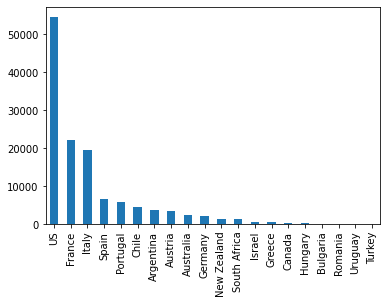

In [5]:
f1(data,"country")

#### (2) province

共有 425 种类 province


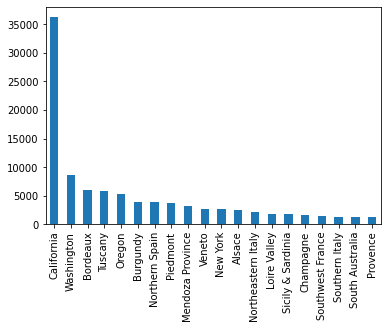

In [6]:
f1(data,"province")

#### (3) variety

共有 707 种类 variety


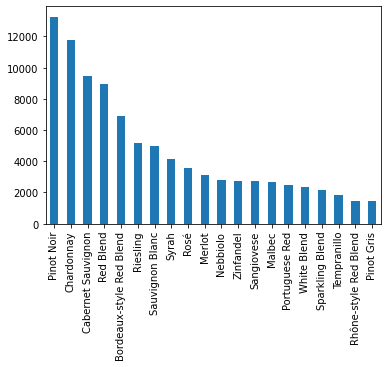

In [7]:
f1(data,"variety")

#### (4) winery

共有 16757 种类 winery


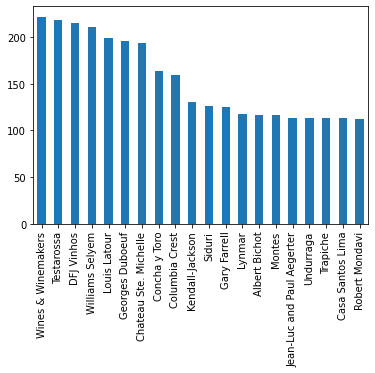

In [8]:
f1(data,"winery")

### 数值属性
#### (1) points

In [9]:
def f2(s,name):
    d = s[name].describe()
    print(name+" 五数："+str(d["min"])+", "+str(d["25%"])+", "+str(d["50%"])+", "+str(d["75%"])+", "+str(d["max"]))
    nc = s[name].size - s[name].count()
    print("缺失值数量："+str(nc))

In [10]:
f2(data,"points")

points 五数：80.0, 86.0, 88.0, 91.0, 100.0
缺失值数量：0


#### (2) price

In [11]:
f2(data,"price")

price 五数：4.0, 17.0, 25.0, 42.0, 3300.0
缺失值数量：8996


## 数据可视化
#### (1) points

In [12]:
def f3(s,name,upp=None):
    p = s[name]
    if upp is not None:
        p = p[p<=upp]
    p.plot.hist()

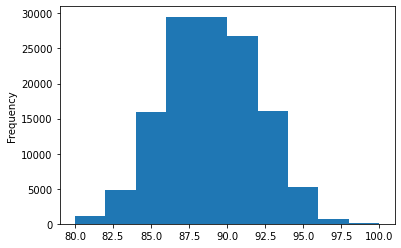

In [13]:
f3(data,"points")

#### (2) price

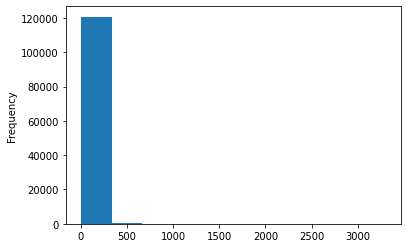

In [14]:
f3(data,"price")

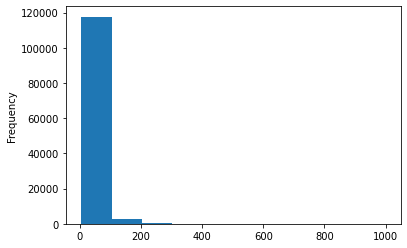

In [15]:
f3(data,"price",1000)

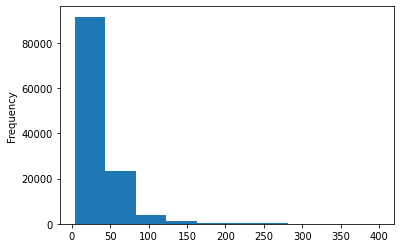

In [16]:
f3(data,"price",400)

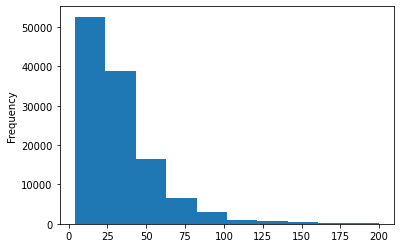

In [17]:
f3(data,"price",200)

## 数据缺失
`price` 有数据缺失。
#### (1) 将缺失部分剔除

In [18]:
data1 = data[data["price"].notna()]

#### (2) 用最高频率值来填补缺失值

In [19]:
def g2(s,name,upp=None,ymax=None):
    v = s[name].value_counts().index[0]
    print("填充值为 "+str(v))
    w = s.copy(True)
    w[name] = s[name].fillna(s[name].value_counts().index[0])
    plt.subplot(1,2,1)
    f3(s,name,upp)
    if ymax is not None:
        plt.ylim([0,ymax])
    plt.subplot(1,2,2)
    f3(w,name,upp)
    if ymax is not None:
        plt.ylim([0,ymax])

填充值为 20.0


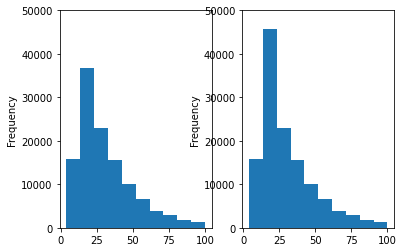

In [20]:
g2(data,"price",upp=100,ymax=50000)

#### (3) 通过属性的相关关系来填补缺失值
考虑 `points` 与 `price` 之间的关系

<AxesSubplot:xlabel='points', ylabel='price'>

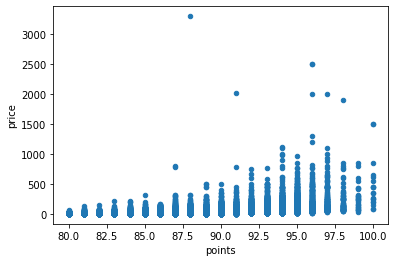

In [21]:
data.plot.scatter("points","price")

考虑用各 `points` 对应 `price` 的中位数填补。

(0.0, 50000.0)

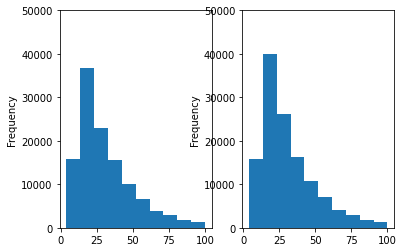

In [22]:
# This cell is time-consuming
data3 = data.copy(True)
hv3 = data.groupby("points")["price"].median()
for i in range(data.shape[0]):
    if pd.isna(data3["price"][i]):
        data3.loc[i,["price"]] = hv3[data3["points"][i]]
plt.subplot(1,2,1)
f3(data,"price",100)
plt.ylim([0,50000])
plt.subplot(1,2,2)
f3(data3,"price",100)
plt.ylim([0,50000])

#### (4) 通过数据对象之间的相似性来填补缺失值

(0.0, 50000.0)

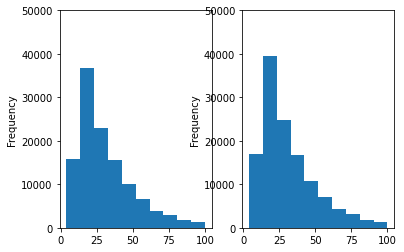

In [23]:
data4 = data.copy(True)
data4["price"] = data4["price"].ffill()
plt.subplot(1,2,1)
f3(data,"price",100)
plt.ylim([0,50000])
plt.subplot(1,2,2)
f3(data4,"price",100)
plt.ylim([0,50000])